# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
from sklearn.linear_model import LinearRegression

/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print df.head()
#print len(df), 'rows'

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

In [3]:
df.groupby(by = df['admit']).count()

,gre,gpa,prestige
admit,,,
0,271,271,271
1,126,126,126


In [4]:
df.pivot_table(columns=  ['prestige'], index = 'admit',aggfunc='count')

gpa             gre            
prestige 1.0 2.0 3.0 4.0 1.0 2.0 3.0 4.0
admit                                   
0         28  95  93  55  28  95  93  55
1         33  53  28  12  33  53  28  12

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


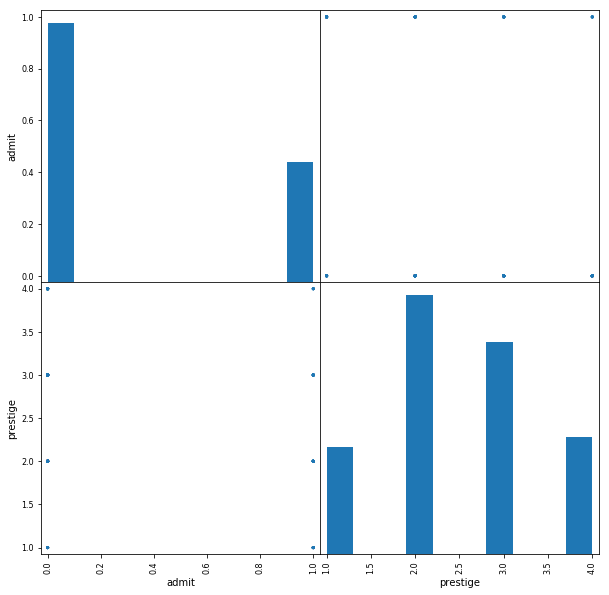

In [5]:
# frequency table for prestige and whether or not someone was admitted
pd.scatter_matrix(df[['admit','prestige']], figsize=(10,10));

## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [6]:
df_clean = pd.concat([df, pd.get_dummies(df['prestige'], prefix='prestige')], axis=1,); 

#df_clean.columns = ['admit','gre','gpa','prestige', 'prestige_1','prestige_2','prestige_3','prestige_4', 'admit_no','admit_yes']
#df_clean2 = pd.concat([df_clean, pd.get_dummies(df_clean['admit'], prefix='admit')], axis=1,); 
df_clean

,admit,gre,gpa,prestige,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,3.0,0,0,1,0
1,1,660.0,3.67,3.0,0,0,1,0
2,1,800.0,4.00,1.0,1,0,0,0
3,1,640.0,3.19,4.0,0,0,0,1
4,0,520.0,2.93,4.0,0,0,0,1
5,1,760.0,3.00,2.0,0,1,0,0
6,1,560.0,2.98,1.0,1,0,0,0
7,0,400.0,3.08,2.0,0,1,0,0
8,1,540.0,3.39,3.0,0,0,1,0
9,0,700.0,3.92,2.0,0,1,0,0


In [7]:
model = LinearRegression()
features = ['prestige_1.0','prestige_2.0','prestige_3.0','prestige_4.0']
X,y = df_clean[features], df.admit
results = model.fit(X, y);
print results.intercept_, results.coef_

0.327400287739 [ 0.21358332  0.03070782 -0.09599533 -0.14829581]


#### 2.2 When modeling our class variables, how many do we need? 



Answer: I ~think~ we need all four in order to account for the four different levels of prestige in our dataset. 

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [19]:
cols_to_keep = ['admit', 'gre', 'gpa']
dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')

# handCalc = df_clean[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_1.0',:])
# #print handCalc.head()

In [9]:
#crosstab prestige 1 admission 
# frequency table cutting prestige and whether or not someone was admitted
df.pivot_table(columns=  ['prestige'], index = 'admit',aggfunc='count')

gpa             gre            
prestige 1.0 2.0 3.0 4.0 1.0 2.0 3.0 4.0
admit                                   
0         28  95  93  55  28  95  93  55
1         33  53  28  12  33  53  28  12

#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [10]:
odds_admitted = (33/28.) 
print odds_admitted

1.17857142857


#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [11]:
odds_not_admitted  = (53+28+12) / ((95+93+55.))
print odds_not_admitted

0.382716049383


#### 3.3 Calculate the odds ratio

In [12]:
oddsratio = odds_admitted/odds_not_admitted
print oddsratio
print oddsratio - 1

3.07949308756
2.07949308756


#### 3.4 Write this finding in a sentenance: 

Answer:  For students who went to a #1 ranked college, the odds of you getting into grad school is 3.07x the odds of a student who didn't attend a #1 ranked college



#### 3.5 Print the cross tab for prestige_4

In [13]:
df.pivot_table(columns=  ['prestige'], index = 'admit',aggfunc='count')

gpa             gre            
prestige 1.0 2.0 3.0 4.0 1.0 2.0 3.0 4.0
admit                                   
0         28  95  93  55  28  95  93  55
1         33  53  28  12  33  53  28  12

#### 3.6 Calculate the OR 

In [14]:
odds_admitted = (12/55.) 
odds_not_admitted  = (33+53+28) / ((28+95+93.))
oddsratio = odds_admitted/odds_not_admitted
print oddsratio
#print oddsratio - 1

0.413397129187


#### 3.7 Write this finding in a sentence

Answer: For students who went to a #4 ranked college, the odds of you getting into grad school is .41x the odds of a student who attended a #1,#2, or #3 ranked college

## Part 4. Analysis

In [20]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])
print data.head()

   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             1             0
1      1  660.0  3.67             0             1             0
2      1  800.0  4.00             0             0             0
3      1  640.0  3.19             0             0             1
4      0  520.0  2.93             0             0             1


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [24]:
# manually add the intercept
data['intercept'] = 1.0

#### 4.1 Set the covariates to a variable called train_cols

In [22]:
train_cols = data.columns[1:]
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])


#### 4.2 Fit the model

In [25]:
logit = sm.Logit(data['admit'], data[train_cols])
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


#### 4.3 Print the summary results

In [26]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Sat, 06 Jan 2018   Pseudo R-squ.:                 0.08166
Time:                        11:58:09   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043    7.44e-05       0.004
gpa              0.7793      0.333      2.344      0.019       0.128       1.431
prestige_2.0    -0.6801      0.317     -2.14

#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [27]:
#I don't quite understand the logic that was in the project 3 solutions. 
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print np.exp(conf)

                  2.5%     97.5%        OR
gre           1.000074  1.004372  1.002221
gpa           1.136120  4.183113  2.180027
prestige_2.0  0.272168  0.942767  0.506548
prestige_3.0  0.133377  0.515419  0.262192
prestige_4.0  0.093329  0.479411  0.211525
intercept     0.002207  0.194440  0.020716


#### 4.5 Interpret the OR of Prestige_2

Answer: Students who attended a Prestige2 school have a .50x the odds of being admitted compared to any other student from a non-Prestige2 school 

#### 4.6 Interpret the OR of GPA

Answer: A little unsure here. The higher the GPA, you have 2.18times the odds of being accepted? 

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [28]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [29]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


#### 5.1 Recreate the dummy variables

In [31]:
# recreate the dummy variables
combos
# keep only what we need for making predictions


,0,1,2,3
0,220.0,2.260000,1.0,1.0
1,220.0,2.260000,2.0,1.0
2,220.0,2.260000,3.0,1.0
3,220.0,2.260000,4.0,1.0
4,220.0,2.453333,1.0,1.0
5,220.0,2.453333,2.0,1.0
6,220.0,2.453333,3.0,1.0
7,220.0,2.453333,4.0,1.0
8,220.0,2.646667,1.0,1.0
9,220.0,2.646667,2.0,1.0


#### 5.2 Make predictions on the enumerated dataset

#### 5.3 Interpret findings for the last 4 observations

Answer: 

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.